# Create Latitude and Longitude Combinations

In [8]:
# Import dependencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
# Create a set of random latitude and longitude combinations
# pack the latitudes (lats) and longitudes (lngs) as pairs by zipping them (lat_lngs) with the zip() function
# The zip object packs each pair of lats and lngs having the same index in their respective array into a tuple

lats = np.random.uniform(-90,90, size=1500)
lngs = np.random.uniform(-180,180, size=1500)
lat_lngs = zip(lats, lngs)

# When we run this cell, the output is a zip object in memory
lat_lngs

In [10]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)
coordinates

[(46.464709976801316, 46.04130614495381),
 (-82.36949606447942, 59.44509732880613),
 (-58.76907081333219, -154.82853686503094),
 (38.96651855787542, 66.83767374203157),
 (-16.786211783409243, -3.893511152287658),
 (43.12557446600894, 64.38238267168933),
 (-66.48313761054162, -4.95294080968398),
 (48.361114178002595, -92.54874070138237),
 (-53.838392250619734, -84.38487711700728),
 (71.48907967862073, -168.91577430323633),
 (-31.237202644673843, -96.75065360830122),
 (89.20516793974244, 95.5525253539675),
 (59.21250868486007, -96.79378680451424),
 (36.181291913912474, -99.36680040957718),
 (-63.69641369921884, 73.93120362805067),
 (66.9574200827262, -164.5477525561411),
 (39.02236444611563, 86.95317995684678),
 (48.17419936348372, 150.06383624441082),
 (-85.54175787707415, 23.64244278310403),
 (-71.72627027047432, 119.2887964444144),
 (-51.48413988381078, 87.75875315532568),
 (9.02759505796702, 81.3164371915077),
 (27.926523231672846, 31.166312124613626),
 (-47.77243420961682, 137.62557

In [11]:
# You can only unzip a zipped tuple once before it is removed from the computer’s memory. 
# Make sure you unzip the latitudes and longitudes into the coordinates list before moving on.

# Work with citipy

In [12]:
from citipy import citipy

In [13]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count.
len(cities)

620

In [15]:
cities

['yashkul',
 'east london',
 'mataura',
 'kitob',
 'jamestown',
 'tasbuget',
 'cape town',
 'fort frances',
 'punta arenas',
 'lavrentiya',
 'lebu',
 'khatanga',
 'thompson',
 'woodward',
 'saint-philippe',
 'nome',
 'korla',
 'vostok',
 'bredasdorp',
 'albany',
 'busselton',
 'trincomalee',
 'matay',
 'portland',
 'petropavlovsk-kamchatskiy',
 'mar del plata',
 'ushuaia',
 'lata',
 'tuktoyaktuk',
 'ponta do sol',
 'bambous virieux',
 'butaritari',
 'hermanus',
 'saint-michel-des-saints',
 'kuche',
 'adrar',
 'havelock',
 'kargasok',
 'amderma',
 'shu',
 'bluff',
 'kodiak',
 'hovd',
 'jilib',
 'rocha',
 'goderich',
 'sechura',
 'mys shmidta',
 'nizhneyansk',
 'rikitea',
 'chokurdakh',
 'abomsa',
 'dikson',
 'anito',
 'airai',
 'barrow',
 'arraial do cabo',
 'lubao',
 'ahuimanu',
 'taolanaro',
 'chuy',
 'port elizabeth',
 'ikovka',
 'kruisfontein',
 'santa isabel do rio negro',
 'qaanaaq',
 'ulan-ude',
 'iqaluit',
 'uribia',
 'matias olimpio',
 'codrington',
 'vaini',
 'college',
 'clyd

# Request API Weather Data for All Cities

In [7]:
# Import the requests library.
import requests

requests.__version__

'2.23.0'

In [3]:
# Import the API key.
from config import api_key

# Import the datetime module from the datetime library.
from datetime import datetime

In [4]:
# Starting URL for Weather Map API Call.
# units=Imperial added to url
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

In [5]:
url

'http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=552fbf063873c103d40289be2cab9ac2'

In [10]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1


# To reference the city in our code, we need to use the indexing on the cities_list, but this will cause programming
# errors when building the city_url because it adds the index, not the city name, to the city_url. To fix this issue,
# use the enumerate() method as an alternative way to iterate through the list of cities and retrieve both the index
# and the city from the list.

# Loop through all the cities in our list.
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Generally, it isn’t good coding practice to add the pass statement to the except block. Ideally, we want to handle
# or catch each error as it happens and do something specific (e.g., add another try block or print out the error).
    
# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | sambava
Processing Record 2 of Set 1 | provideniya
Processing Record 3 of Set 1 | nerja
Processing Record 4 of Set 1 | nieuw amsterdam
Processing Record 5 of Set 1 | chkalovsk
Processing Record 6 of Set 1 | okha
Processing Record 7 of Set 1 | grajau
Processing Record 8 of Set 1 | yagodnoye
Processing Record 9 of Set 1 | port alfred
Processing Record 10 of Set 1 | puerto ayora
Processing Record 11 of Set 1 | troyes
Processing Record 12 of Set 1 | pirgos
Processing Record 13 of Set 1 | georgetown
Processing Record 14 of Set 1 | atuona
Processing Record 15 of Set 1 | rikitea
Processing Record 16 of Set 1 | kijang
Processing Record 17 of Set 1 | busselton
Processing Record 18 of Set 1 | dikson
Processing Record 19 of Set 1 | manhattan
Processing Record 20 of Set 1 | coquimbo
Processing Record 21 of Set 1 | victoria
Processing Record 22 of Set 1 | arraial do cabo
Processing Record 23 of Set 1 | samusu

Processing Record 39 of Set 4 | terrace
Processing Record 40 of Set 4 | hambantota
Processing Record 41 of Set 4 | lompoc
Processing Record 42 of Set 4 | khandyga
Processing Record 43 of Set 4 | faanui
Processing Record 44 of Set 4 | alice springs
Processing Record 45 of Set 4 | hobart
Processing Record 46 of Set 4 | shizunai
Processing Record 47 of Set 4 | the valley
Processing Record 48 of Set 4 | toliary
City not found. Skipping...
Processing Record 49 of Set 4 | mount gambier
Processing Record 50 of Set 4 | chepareria
Processing Record 1 of Set 5 | tomatlan
Processing Record 2 of Set 5 | sonari
Processing Record 3 of Set 5 | palabuhanratu
City not found. Skipping...
Processing Record 4 of Set 5 | ayagoz
Processing Record 5 of Set 5 | ixtapa
Processing Record 6 of Set 5 | bonavista
Processing Record 7 of Set 5 | adamas
Processing Record 8 of Set 5 | severo-kurilsk
Processing Record 9 of Set 5 | paragominas
Processing Record 10 of Set 5 | callaway
Processing Record 11 of Set 5 | uruc

Processing Record 32 of Set 8 | avera
Processing Record 33 of Set 8 | kieta
Processing Record 34 of Set 8 | nago
Processing Record 35 of Set 8 | ozgon
City not found. Skipping...
Processing Record 36 of Set 8 | chake chake
Processing Record 37 of Set 8 | moura
Processing Record 38 of Set 8 | talnakh
Processing Record 39 of Set 8 | pitanga
Processing Record 40 of Set 8 | shumikha
Processing Record 41 of Set 8 | negombo
Processing Record 42 of Set 8 | dangriga
Processing Record 43 of Set 8 | salina cruz
Processing Record 44 of Set 8 | dubti
Processing Record 45 of Set 8 | tumut
Processing Record 46 of Set 8 | vila velha
Processing Record 47 of Set 8 | san pedro de macoris
Processing Record 48 of Set 8 | deputatskiy
Processing Record 49 of Set 8 | bundaberg
Processing Record 50 of Set 8 | sabang
Processing Record 1 of Set 9 | brae
Processing Record 2 of Set 9 | kamenka
Processing Record 3 of Set 9 | oktyabrskoye
Processing Record 4 of Set 9 | limon
Processing Record 5 of Set 9 | inta
Proc

Processing Record 24 of Set 12 | dali
Processing Record 25 of Set 12 | bose
Processing Record 26 of Set 12 | homestead
Processing Record 27 of Set 12 | srandakan
Processing Record 28 of Set 12 | jumla
Processing Record 29 of Set 12 | muravlenko
Processing Record 30 of Set 12 | oussouye
Processing Record 31 of Set 12 | madera
Processing Record 32 of Set 12 | jabiru
City not found. Skipping...
Processing Record 33 of Set 12 | zhuhai
Processing Record 34 of Set 12 | sept-iles
Processing Record 35 of Set 12 | nanga eboko
Processing Record 36 of Set 12 | cap malheureux
Processing Record 37 of Set 12 | along
Processing Record 38 of Set 12 | aasiaat
Processing Record 39 of Set 12 | guerrero negro
Processing Record 40 of Set 12 | noumea
Processing Record 41 of Set 12 | shimoda
Processing Record 42 of Set 12 | arica
Processing Record 43 of Set 12 | ocean city
Processing Record 44 of Set 12 | karratha
Processing Record 45 of Set 12 | zomba
Processing Record 46 of Set 12 | nehe
Processing Record 

In [11]:
# Count the number of cities in city_data
len(city_data)

581

# Convert the Array of Dictionaries to Other Formats & Reorder Columns

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Sambava,-14.27,50.17,72.32,83,100,18.03,MG,2020-06-18 16:44:57
1,Provideniya,64.38,-173.30,56.21,57,12,2.68,RU,2020-06-18 16:44:58
2,Nerja,36.76,-3.89,73.99,75,76,1.79,ES,2020-06-18 16:44:58
3,Nieuw Amsterdam,5.88,-55.08,87.80,58,75,9.17,SR,2020-06-18 16:44:58
4,Chkalovsk,56.76,43.24,69.80,60,20,4.47,RU,2020-06-18 16:44:58
5,Okha,53.57,142.95,39.58,95,100,9.37,RU,2020-06-18 16:44:58
6,Grajau,-5.82,-46.14,87.21,40,0,7.31,BR,2020-06-18 16:44:58
7,Yagodnoye,62.55,149.67,54.46,56,63,4.45,RU,2020-06-18 16:44:59
8,Port Alfred,-33.59,26.89,59.00,74,0,4.00,ZA,2020-06-18 16:44:59
9,Puerto Ayora,-0.74,-90.35,80.60,57,20,19.46,EC,2020-06-18 16:44:59


In [13]:
# Assign new column order to a variable
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed",]

In [14]:
#Assign new column order to df
city_data_df = city_data_df[new_column_order]

In [15]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Sambava,MG,2020-06-18 16:44:57,-14.27,50.17,72.32,83,100,18.03
1,Provideniya,RU,2020-06-18 16:44:58,64.38,-173.30,56.21,57,12,2.68
2,Nerja,ES,2020-06-18 16:44:58,36.76,-3.89,73.99,75,76,1.79
3,Nieuw Amsterdam,SR,2020-06-18 16:44:58,5.88,-55.08,87.80,58,75,9.17
4,Chkalovsk,RU,2020-06-18 16:44:58,56.76,43.24,69.80,60,20,4.47
5,Okha,RU,2020-06-18 16:44:58,53.57,142.95,39.58,95,100,9.37
6,Grajau,BR,2020-06-18 16:44:58,-5.82,-46.14,87.21,40,0,7.31
7,Yagodnoye,RU,2020-06-18 16:44:59,62.55,149.67,54.46,56,63,4.45
8,Port Alfred,ZA,2020-06-18 16:44:59,-33.59,26.89,59.00,74,0,4.00
9,Puerto Ayora,EC,2020-06-18 16:44:59,-0.74,-90.35,80.60,57,20,19.46


In [16]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

# Plotting Weather Data

In [17]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [18]:
# Import the time module.
import time

## Plot Latitude vs. Temperature

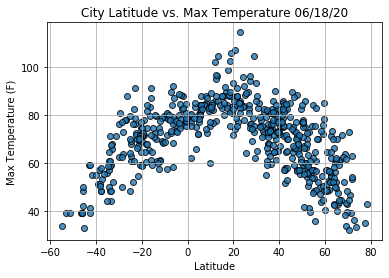

In [19]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

## Plot Latitude vs. Humidity

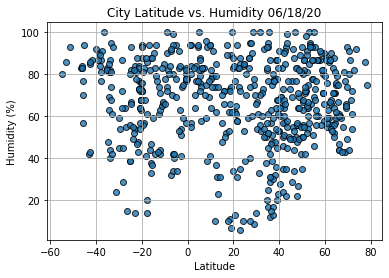

In [20]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

## Plot Latitude vs. Cloudiness

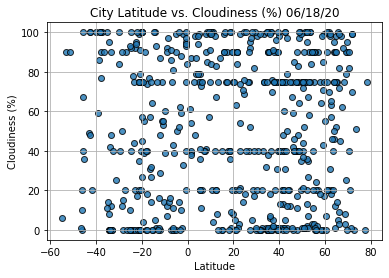

In [21]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

## Plot Latitude vs. Wind Speed

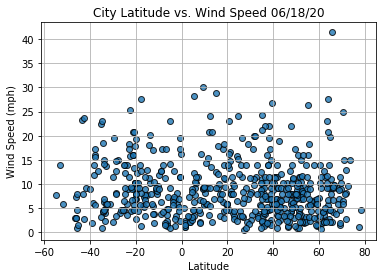

In [22]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

# Use Linear Regression to Find the Relationship Between Variables

## Create the Hemisphere DataFrames

In [70]:
# Use loc function to get all Northern Hemisphere latitudes (latitudes greater than or equal to 0)
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Provideniya,RU,2020-06-18 16:44:58,64.38,-173.30,56.21,57,12,2.68
2,Nerja,ES,2020-06-18 16:44:58,36.76,-3.89,73.99,75,76,1.79
3,Nieuw Amsterdam,SR,2020-06-18 16:44:58,5.88,-55.08,87.80,58,75,9.17
4,Chkalovsk,RU,2020-06-18 16:44:58,56.76,43.24,69.80,60,20,4.47
5,Okha,RU,2020-06-18 16:44:58,53.57,142.95,39.58,95,100,9.37


In [71]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

## Correlation Between Latitude and Maximum Temperature

In [72]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [235]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.  
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()
    
# To get an output from a function, call the function with the correct number of parameters for the function.

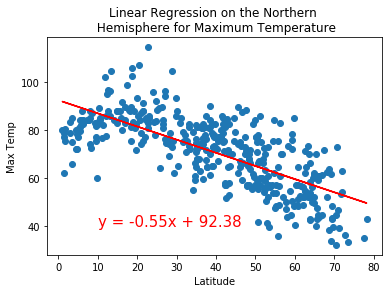

In [236]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern \n Hemisphere for Maximum Temperature', 'Max Temp',(10,40))

# If the equation for the regression line doesn’t show up on your graph, you can change the text_coordinates until you see the equation.

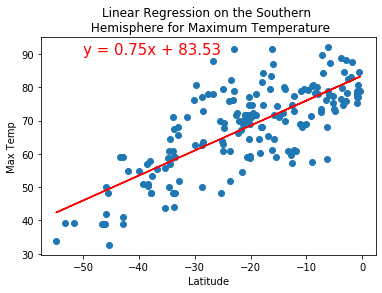

In [237]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern \n Hemisphere for Maximum Temperature', 'Max Temp',(-50,90))

##Graph title is wrong!

In [238]:
# The correlation between the latitude and the maximum temperature is strong to very strong because the r-value is
# less than –0.7 for the Northern Hemisphere and greater than 0.7 for the Southern Hemisphere, as shown by the plots
# here. This means that as we approach the equator, 0° latitude, the temperatures become warmer. And when we are 
#further from the equator the temperatures become cooler. Check the r-values for your plots.

## Correlation Between Latitude and Percent Humidity

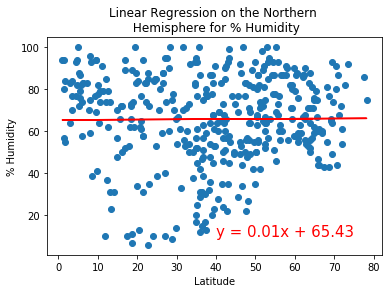

In [239]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern \n Hemisphere for % Humidity', '% Humidity',(40,10))

##Graph title is wrong!

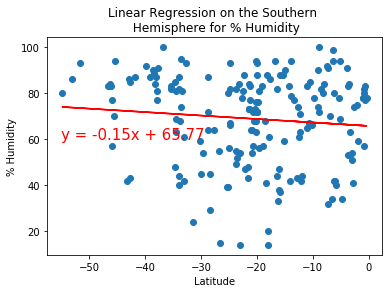

In [240]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern \n Hemisphere for % Humidity', '% Humidity',(-55,60))

In [79]:
# The correlation between the latitude and percent humidity is very low because the r-value is less than 0.04 for the
# Northern and Southern Hemispheres for the plots shown here. This means that percent humidity is unpredictable due to
# changing weather patterns that can increase or decrease percent humidity. Check the r-values for your plots. 

## Correlation Between Latitude and Percent Cloudiness

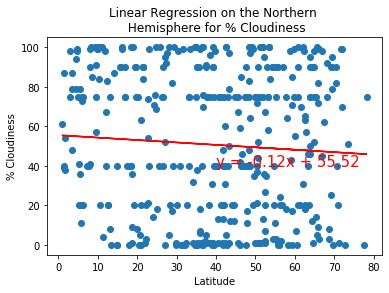

In [241]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern \n Hemisphere for % Cloudiness', '% Cloudiness',(40,40))

##Graph title is wrong!

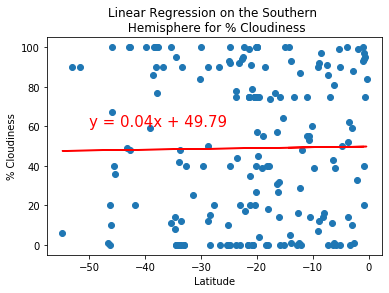

In [242]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern \n Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))

In [85]:
# The correlation between the latitude and percent cloudiness is very low because the r-value is less than –0.09 for 
# the Northern Hemisphere and less than –0.02 for the Southern Hemisphere for the plots shown here. This means that 
# cloudiness is unpredictable due to changing weather patterns that can increase or decrease percent cloudiness. 
# Check the r-values for your plots. 

## Correlation Between Latitude and Wind Speed

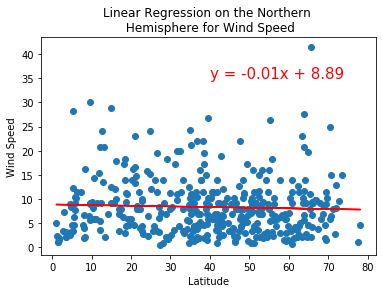

In [243]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern \n Hemisphere for Wind Speed', 'Wind Speed',(40,35))

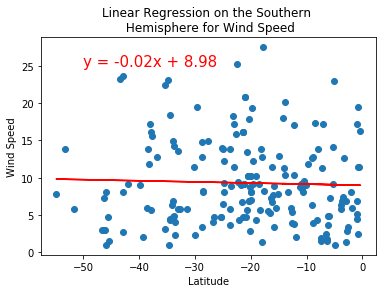

In [244]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern \n Hemisphere for Wind Speed', 'Wind Speed',(-50,25))

In [89]:
# The correlation between the latitude and wind speed is very low because the r-value is less  than –0.07 for the 
# Northern Hemisphere and less than –0.3 for the Southern Hemisphere for the plots shown here . This means that wind 
# speed is unpredictable due to changing weather patterns that can increase or decrease wind speed. 
# Check the r-values for your plots. 